In [74]:
import pandas as pd
import numpy as np
# Initialization
!pip install nltk
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
nltk.download('wordnet')
nltk.download('omw-1.4')
from cleanup_functions import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
# data
INPUT_NAME='train_wikipedia'
#INPUT_NAME='train_civil'

df=pd.read_csv("../data/"+INPUT_NAME+ "_pre_clean.csv")
df = df.reset_index(drop=True)

In [55]:
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. I...",0,0,0,0,0,0
3,0001b41b1c6bb37e,More I cannot make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# list of badwords
toxic_words = ['bitch', 'fuck', 'shit', 'piss', 'dick', 'motherfucker', 'ass', 
'asshole', 'bastard', 'damn', 'cunt', 'faggot', 'slut', 'whore']
# not in: 'meathead','douche-bag'

## Get rid of signs

In [54]:

df["comment_text"]  = df["comment_text"] .apply(lambda x: x.encode("latin-1","ignore").decode('ISO-8859-1'))


In [8]:
# function to get word from index
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]
print(get_term(vect.vocabulary_, 36776))

# get index
def get_word_index(dict, word):
    return dict[word]
print(get_word_index(vect.vocabulary_, 'bitch'))

bwtter
30581


# Lemmatization

In [56]:

WNlemma = nltk.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
# analyzer = TfidfVectorizer(min_df=15).build_analyzer()

def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in analyzer(doc))

lemm_vectorizer = CountVectorizer(min_df=15, analyzer=lemmatize_word)
#lemm_vectorizer = TfidfVectorizer(min_df=15, analyzer=lemmatize_word)

# Transform X_train
X_train_lemm_vectorized = lemm_vectorizer.fit_transform(df['comment_text'])

In [57]:
lemm_vectorizer.vocabulary_

{'explanation': 6517,
 'why': 18661,
 'the': 17006,
 'edits': 5852,
 'made': 10410,
 'under': 17733,
 'my': 11367,
 'username': 18036,
 'hardcore': 8009,
 'metallica': 10855,
 'fan': 6688,
 'were': 18583,
 'reverted': 14484,
 'they': 17055,
 'not': 11755,
 'vandalism': 18111,
 'just': 9600,
 'closure': 3524,
 'on': 12035,
 'some': 15840,
 'gas': 7443,
 'after': 935,
 'voted': 18362,
 'at': 1717,
 'new': 11580,
 'york': 19020,
 'doll': 5531,
 'fac': 6605,
 'and': 1254,
 'please': 12883,
 'do': 5495,
 'remove': 14203,
 'template': 16902,
 'from': 7269,
 'talk': 16761,
 'page': 12336,
 'since': 15542,
 'am': 1156,
 'retired': 14439,
 'now': 11796,
 '89': 541,
 '205': 333,
 '38': 449,
 '27': 405,
 'aww': 1885,
 'he': 8096,
 'match': 10655,
 'this': 17076,
 'background': 1924,
 'colour': 3660,
 'seemingly': 15144,
 'stuck': 16347,
 'with': 18809,
 'thanks': 16997,
 '21': 340,
 '51': 484,
 'january': 9416,
 '11': 31,
 '2016': 329,
 'utc': 18055,
 'hey': 8223,
 'man': 10497,
 'really': 13857,

In [58]:
X_train_lemm_vectorized.shape

(223542, 19098)

In [59]:
# how to get index in df with specific word
X_array = X_train_lemm_vectorized.toarray()


In [60]:
X_array.shape

(223542, 19098)

In [61]:
# transpose X_array
df_occurrence = pd.DataFrame(data=X_array,columns = lemm_vectorizer.get_feature_names_out())
df_occurrence

,00,001,004,007,01,02,03,04,05,06,...,zone,zoo,zoological,zoom,zora,zoroastrian,zu,zulu,zurich,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
words_in_corpus = lemm_vectorizer.get_feature_names_out()
words_in_corpus

array(['00', '001', '004', ..., 'zulu', 'zurich', 'über'], dtype=object)

In [63]:
# check if toxic words are in 
[curse_word in words_in_corpus for curse_word in toxic_words]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [65]:
df_occurrence['bitch'] + df_occurrence['slut'] 

0         0
1         0
2         0
3         0
4         0
         ..
223537    0
223538    0
223539    0
223540    1
223541    0
Length: 223542, dtype: int64

In [67]:
index_toxic = sum(df_occurrence[insult] for insult in toxic_words) > 0

In [68]:
df['toxic_baseline'] = index_toxic

In [69]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'toxic_baseline'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt
# important functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

def print_evaluations(y,predictions):
    print(f"Accuracy: {accuracy_score(y, predictions)}")
    print(f"Precision: {precision_score(y, predictions)}")
    print(f"Recall: {recall_score(y, predictions)}")
    print(f"F1: {f1_score(y, predictions)}")

In [75]:
print_evaluations(df['toxic'],df['toxic_baseline'])

Accuracy: 0.927530396972381
Precision: 0.7485615650172612
Recall: 0.36503928170594835
F1: 0.4907582044511504


Confusion matrix, without normalization
[[199536   2622]
 [ 13578   7806]]


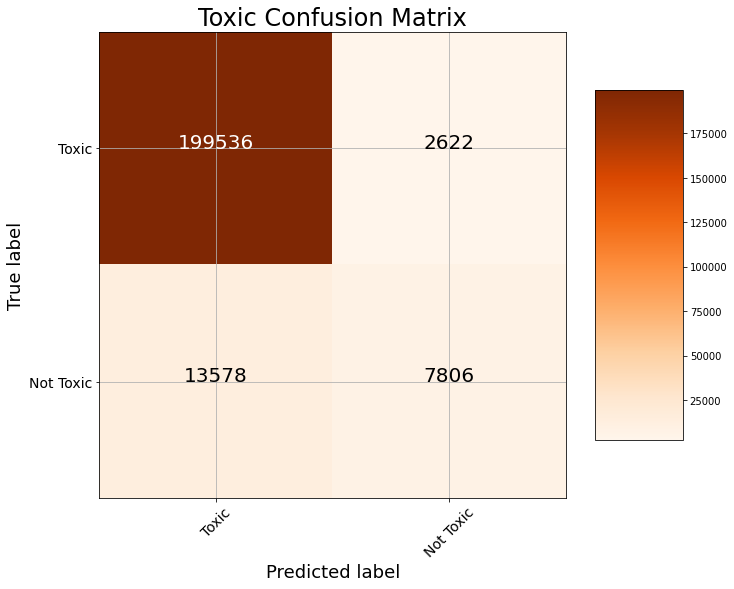

In [77]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(df['toxic'],df['toxic_baseline'])

plot_confusion_matrix(cm, classes = ['Toxic', 'Not Toxic'],
                      title = 'Toxic Confusion Matrix')